Домашнее задание
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки
sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую
переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака -
sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и
визуализируйте полученную кластеризацию

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [29]:
iris = load_iris()

In [18]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['variety'] = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
from sklearn.model_selection import train_test_split
data = data[['sepal length (cm)', 'sepal width (cm)', 'variety']]
data_train, data_test = train_test_split(data, test_size=0.2)

,sepal length (cm),sepal width (cm),variety
105,7.6,3.0,2
108,6.7,2.5,2
133,6.3,2.8,2
74,6.4,2.9,1
122,7.7,2.8,2
...,...,...,...
38,4.4,3.0,0
78,6.0,2.9,1
100,6.3,3.3,2
98,5.1,2.5,1


In [21]:
y_train, y_test = data_train['variety'], data_test['variety']
del data_train['variety']
del data_test['variety']

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [26]:
lda.predict(data_test)

array([2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 0])

In [28]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,2,2
1,1,1
2,0,0
3,2,2
4,1,1
5,1,1
6,1,1
7,0,0
8,2,1
9,1,1


In [32]:
from sklearn.metrics import accuracy_score
print(f'Качество модели: {accuracy_score(y_test, lda.predict(data_test))}')
print(f'значимость признаков: \n {lda.coef_}')

Качество модели: 0.8
значимость признаков: 
 [[-6.05787037  8.67860122]
 [ 2.03962603 -4.578002  ]
 [ 4.48423437 -4.76818392]]


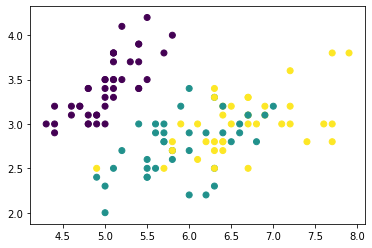

In [38]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.show()

In [39]:
lda.means_

array([[5.01904762, 3.42142857],
       [5.93846154, 2.76153846],
       [6.60512821, 2.98974359]])

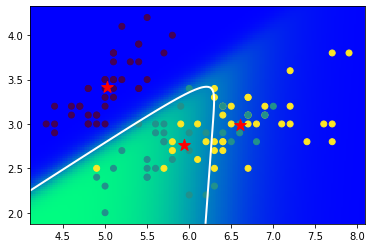

In [48]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = 'winter',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [52]:
del data['variety']
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
# Кластаризация

In [54]:
from sklearn.cluster import KMeans

In [57]:
# Число кластеров по факту датасета
# Переопределим значения по кластеров на основании модели
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

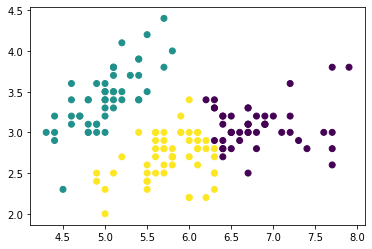

In [62]:
# Визуализация изменилась
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=clusters)

In [60]:
# Оптимальное число кластеров
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    k_inertia.append(clf_kmeans.inertia_)

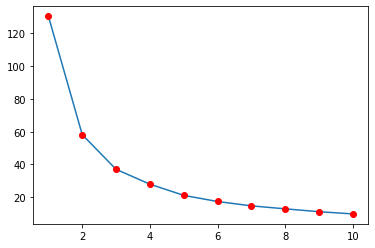

In [61]:
# По графику на основании двух признаком можно разделить и на 2 кластера
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [63]:
# Методом иерархии
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

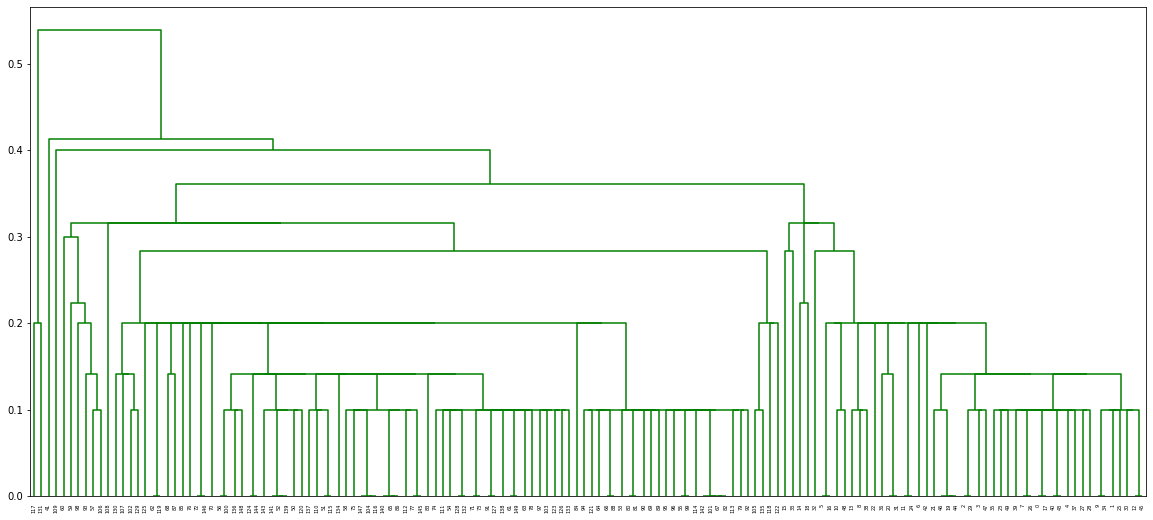

In [65]:
# методом иерархии тоже получается, что деление на 2 кластера являются оптимальным

distance_mat = pdist(data) # pdist посчитает нам верхний треугольник матрицы попарных расстояний
Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z, color_threshold=0.8)

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [68]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(data)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

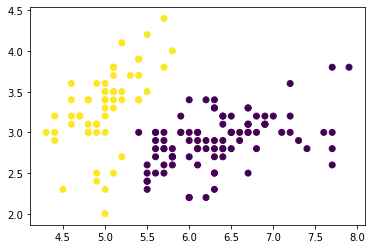

In [69]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=clusters)